# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

#from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

Output hidden; open in https://colab.research.google.com to view.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 1.1 Reading Data

In [0]:
project_data = pd.read_csv('/content/drive/My Drive/Data/train_data.csv',nrows=50000)
resource_data = pd.read_csv('/content/drive/My Drive/Data/resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


## 2. Preprocessing

### 2.1  project_subject_categories

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [0]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

In [0]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

### 2.2 project_subject_subcategories¶

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [0]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

In [0]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


### 2.3 Project Essay

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*50)

Describing my students is not an easy task.  Many would say that they are inspirational, creative, and hard-working.  They are all unique - unique in their interests, their learning, their abilities, and so much more.  What they all have in common is their desire to learn each day, despite difficulties that they encounter.  \r\nOur classroom is amazing - because we understand that everyone learns at their own pace.  As the teacher, I pride myself in making sure my students are always engaged, motivated, and inspired to create their own learning! \r\nThis project is to help my students choose seating that is more appropriate for them, developmentally.  Many students tire of sitting in chairs during lessons, and having different seats available helps to keep them engaged and learning.\r\nFlexible seating is important in our classroom, as many of our students struggle with attention, focus, and engagement.  We currently have stability balls for seating, as well as regular chairs, but thes

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Describing my students is not an easy task.  Many would say that they are inspirational, creative, and hard-working.  They are all unique - unique in their interests, their learning, their abilities, and so much more.  What they all have in common is their desire to learn each day, despite difficulties that they encounter.    Our classroom is amazing - because we understand that everyone learns at their own pace.  As the teacher, I pride myself in making sure my students are always engaged, motivated, and inspired to create their own learning!   This project is to help my students choose seating that is more appropriate for them, developmentally.  Many students tire of sitting in chairs during lessons, and having different seats available helps to keep them engaged and learning.  Flexible seating is important in our classroom, as many of our students struggle with attention, focus, and engagement.  We currently have stability balls for seating, as well as regular chairs, but these stoo

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Describing my students is not an easy task Many would say that they are inspirational creative and hard working They are all unique unique in their interests their learning their abilities and so much more What they all have in common is their desire to learn each day despite difficulties that they encounter Our classroom is amazing because we understand that everyone learns at their own pace As the teacher I pride myself in making sure my students are always engaged motivated and inspired to create their own learning This project is to help my students choose seating that is more appropriate for them developmentally Many students tire of sitting in chairs during lessons and having different seats available helps to keep them engaged and learning Flexible seating is important in our classroom as many of our students struggle with attention focus and engagement We currently have stability balls for seating as well as regular chairs but these stools will help students who have trouble wi

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above statemennts 

preprocessed_essay = []
# tqdm is for printing the status bar
for sentance in project_data['essay'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay.append(sent.lower().strip())

In [0]:
# after preprocesing
preprocessed_essay[20]

'the students school come diverse backgrounds varied experiences over 90 students come considerable poverty this year 100 students district receive free lunches due poverty rate community some students well grade level need enrichment students limited experiences literacy writing vocabulary need work basic skills these differences within class make difficult ensure students getting specifically need daily basis each week students love visiting school library borrowing book week a new carpet library would create cozy place students sit librarian reading book week this would also help brighten library make exciting place students while librarian the carpet i requested designated spaces students sit helping manage behavior also your donation would provide bright colorful carpet library story area librarians teachers volunteers come share stories students first second grade students sharing books listening stories important child development children need know reading important no better w

In [0]:
len(preprocessed_essay)

50000

In [0]:
project_data['preprocessed_essay']=preprocessed_essay
project_data.drop(['essay'], axis=1, inplace=True)

### 2.4 Project title Text

In [0]:
# printing some project title.
print(project_data['project_title'].values[54])
print("="*50)
print(project_data['project_title'].values[170])
print("="*50)
print(project_data['project_title'].values[1079])
print("="*50)



Swim For Life At YMCA!
Alternative Seating for Comfy Classrooms
Hands on Art : Eric Carle


In [0]:

preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in project_data['project_title'].values:
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title .append(sent.lower().strip())

In [0]:
preprocessed_project_title[170]

'alternative seating comfy classrooms'

In [0]:
project_data['preprocessed_project_title'] = preprocessed_project_title

In [0]:
project_data.drop(['project_title'], axis=1, inplace=True)

### 2.5 Price

In [0]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [0]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [0]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

### 2.6 Number of words in the combine essays

In [0]:
essay_word_count = []
for essay in project_data['preprocessed_essay'] :
    e = len(essay.split())
    essay_word_count.append(e)

In [0]:
project_data['essay_word_count']= essay_word_count 

### 2.7 Number of words in the Project Title

In [0]:
title_word_count = []
for title in project_data['preprocessed_project_title'] :
    e = len(title.split())
    title_word_count.append(e)

In [0]:
project_data['Title_word_count']= title_word_count 

In [0]:
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essay,preprocessed_project_title,price,quantity,essay_word_count,Title_word_count
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,my students english learners working english s...,educational support english learners home,154.60,23,161,5
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,our students arrive school eager learn they po...,wanted projector hungry learners,299.00,1,109,4
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,true champions not always ones win guts by mia...,soccer equipment awesome middle school students,516.85,22,202,6
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,i work unique school filled esl english second...,techie kindergarteners,232.90,4,121,2
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,our second grade classroom next year made arou...,interactive math tools,67.98,4,122,3


### 2.8 Computing Sentiment Scores for project Essay

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative. VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [0]:
# Create a SentimentIntensityAnalyzer object.
sid = SentimentIntensityAnalyzer()

In [0]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
Negative=[]
Positive=[]
Neutral=[]
compound=[]

# polarity_scores method of SentimentIntensityAnalyzer 
# oject gives a sentiment dictionary. 
# which contains pos, neg, neu, and compound scores. 

for sentence in project_data['preprocessed_essay']:
    sentiment_dict = sid.polarity_scores(sentence) 
    a=sentiment_dict['neg']
    b=sentiment_dict['neu']
    c=sentiment_dict['pos']
    d=sentiment_dict['compound']
    
    Negative.append(a)
    Positive.append(c)
    Neutral.append(b)
    compound.append(d)


In [0]:
project_data['Negative']=Negative
project_data['Positive']=Positive
project_data['Neutral']=Neutral
project_data['Compound']=compound
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essay,preprocessed_project_title,price,quantity,essay_word_count,Title_word_count,Negative,Positive,Neutral,Compound
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,my students english learners working english s...,educational support english learners home,154.60,23,161,5,0.012,0.144,0.844,0.9694
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,our students arrive school eager learn they po...,wanted projector hungry learners,299.00,1,109,4,0.048,0.283,0.669,0.9856
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,true champions not always ones win guts by mia...,soccer equipment awesome middle school students,516.85,22,202,6,0.122,0.219,0.659,0.9816
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,i work unique school filled esl english second...,techie kindergarteners,232.90,4,121,2,0.106,0.246,0.649,0.9656
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,our second grade classroom next year made arou...,interactive math tools,67.98,4,122,3,0.066,0.143,0.791,0.8524


## 3.1 Splitting data into Train and cross validation(or test): Stratified Sampling

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],stratify=project_data['project_is_approved'], random_state=32)


In [0]:
X_train.shape

(37500, 25)

In [0]:
y_train.shape

(37500,)

In [0]:
X_test.shape

(12500, 26)

In [0]:
y_test.shape

(12500,)

In [0]:
X_test.shape

(12500, 26)

In [0]:
X_train.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essay,preprocessed_project_title,price,quantity,essay_word_count,Title_word_count,Negative,Positive,Neutral,Compound
15711,43429,p169894,39a1994529fa4398f75ce4403a4e201f,Mrs.,SC,2017-01-31 11:09:35,Grades 3-5,Today's classroom is continually changing. I ...,We have transitioned to a flexible seating cla...,NaN,NaN,My students need more of their favorite flexib...,2,1,Math_Science,AppliedSciences Mathematics,today classroom continually changing i work la...,refresh our flexible classroom,112.75,18,165,4,0.033,0.371,0.595,0.9969
31878,4577,p210531,424819801de22a60bba7d0f4354d0258,Ms.,MA,2016-08-21 21:23:38,Grades PreK-2,My students are my babies...I want the world f...,"My Project\r\n\r\nBudget cuts are everywhere, ...",NaN,NaN,My students need various essential school supp...,10,1,Literacy_Language Math_Science,Literacy Mathematics,my students babies i want world i teach three ...,please help with basic school supplies,101.47,15,125,6,0.071,0.229,0.700,0.9635
15876,104415,p224401,82bb971f746edaf008d15291ff77a445,Ms.,CO,2017-04-17 22:11:10,Grades PreK-2,"I love Room 113, our school's K-3 autism cente...",More and more learning is done online. Forget ...,NaN,NaN,My students need two Samsung Plus chromebooks ...,0,1,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,i love room 113 school k 3 autism center when ...,set us free with little technology,429.00,2,170,6,0.093,0.178,0.730,0.9296
37141,172689,p244189,b41115c9e8f96a8a27ed3bf921a8a429,Mrs.,WA,2016-09-08 00:00:52,Grades 3-5,"Our students are high-poverty, high-needs, and...",Learning to play piano builds many different t...,NaN,NaN,My students need two keyboards to learn piano ...,129,1,Music_Arts,Music PerformingArts,our students high poverty high needs highly ca...,two piano keyboards young learners,299.99,2,125,5,0.031,0.380,0.589,0.9939
38963,34496,p212133,b75f43506650e3caa34bf9a5cbf483ee,Mrs.,UT,2016-08-22 17:08:51,Grades 3-5,The students at my school come from various ba...,Coming back to school is difficult for many st...,NaN,NaN,"My students need MyPlate Poster and Plates, Fa...",23,1,Health_Sports,NutritionEducation,the students school come various backgrounds t...,help our plates be healthy,345.25,15,157,5,0.072,0.278,0.650,0.9872


## 4 Make Data Model Ready: encoding numerical, categorical features

### 4.1 Vectorizing Numerical features

##### A. Price

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(price_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_train_data = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Mean : 299.1888226666667
Standard deviation :375.41611545821604


In [0]:
price_standardized_test_data = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

##### B . Number of Previously Proposed Projects by the Teacher

In [0]:
previous_projects = StandardScaler()
previous_projects.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

print("Mean : {}".format(previous_projects.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(previous_projects.var_[0])))

previous_projects_standardized_train_data = previous_projects.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))



Mean : 11.268453333333333
Standard deviation :28.29868335231321


In [0]:
previous_projects_standardized_test_data = previous_projects.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


##### C. Quantity

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(quantity_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(quantity_scalar.var_[0])))

# Now standardize the data with above maen and variance.
quantity_standardized_train_data = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

Mean : 17.064533333333333
Standard deviation :26.97188947989287


In [0]:
quantity_standardized_test_data = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

##### D. Title Word Count Feature

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

Title_Word_Count_scalar = StandardScaler()
Title_Word_Count_scalar.fit(X_train['Title_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(Title_Word_Count_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(Title_Word_Count_scalar.var_[0])))

# Now standardize the data with above maen and variance.
Title_Word_Count_train_data = Title_Word_Count_scalar.transform(X_train['Title_word_count'].values.reshape(-1, 1))
Title_Word_Count_test_data = Title_Word_Count_scalar.transform(X_test['Title_word_count'].values.reshape(-1, 1))

Mean : 4.337893333333334
Standard deviation :1.7822349532601538


##### E. Essay Word Count Feature

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

essay_Word_Count_scalar = StandardScaler()
essay_Word_Count_scalar.fit(X_train['essay_word_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(essay_Word_Count_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(essay_Word_Count_scalar.var_[0])))

# Now standardize the data with above maen and variance.
Essay_Word_Count_train_data = Title_Word_Count_scalar.transform(X_train['essay_word_count'].values.reshape(-1, 1))
Essay_Word_Count_test_data = Title_Word_Count_scalar.transform(X_test['essay_word_count'].values.reshape(-1, 1))

Mean : 151.13178666666667
Standard deviation :38.761228295052206


##### F. Essay Sentiments - positives

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

positive_scalar = StandardScaler()
positive_scalar.fit(X_train['Positive'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(positive_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(positive_scalar .var_[0])))

# Now standardize the data with above maen and variance.
positive_score_train_data = Title_Word_Count_scalar.transform(X_train['Positive'].values.reshape(-1, 1))
positive_score_test_data = Title_Word_Count_scalar.transform(X_test['Positive'].values.reshape(-1, 1))

Mean : 0.26734040000000003
Standard deviation :0.07413162632219351


##### G. Essay Sentiments - negatives

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

negatives_scalar = StandardScaler()
negatives_scalar.fit(X_train['Negative'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(negatives_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(negatives_scalar .var_[0])))

# Now standardize the data with above maen and variance.
negative_score_train_data = Title_Word_Count_scalar.transform(X_train['Negative'].values.reshape(-1, 1))
negative_score_test_data = Title_Word_Count_scalar.transform(X_test['Negative'].values.reshape(-1, 1))

Mean : 0.044986960000000006
Standard deviation :0.03385028473477094


##### H. Essay Sentiments - neutrals

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

neutrals_scalar = StandardScaler()
neutrals_scalar.fit(X_train['Neutral'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(neutrals_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(neutrals_scalar .var_[0])))

# Now standardize the data with above maen and variance.
neutral_score_train_data = Title_Word_Count_scalar.transform(X_train['Neutral'].values.reshape(-1, 1))
neutral_score_test_data = Title_Word_Count_scalar.transform(X_test['Neutral'].values.reshape(-1, 1))

Mean : 0.6876722399999999
Standard deviation :0.07238796557473533


##### I Essay Sentiments - compound

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

Compound_scalar = StandardScaler()
Compound_scalar.fit(X_train['Compound'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(Compound_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(Compound_scalar .var_[0])))

# Now standardize the data with above maen and variance.
Compound_score_train_data = Title_Word_Count_scalar.transform(X_train['Compound'].values.reshape(-1, 1))
Compound_score_test_data = Title_Word_Count_scalar.transform(X_test['Compound'].values.reshape(-1, 1))

Mean : 0.9591411813333334
Standard deviation :0.1536895207508668


### 4.2  Vectorizing Categorical data

#### A. Project Categories

In [0]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot_train_data = vectorizer.transform(X_train['clean_categories'].values)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [0]:
# we use count vectorizer to convert the values into one hot encoded features
categories_one_hot_test_data = vectorizer.transform(X_test['clean_categories'].values)


#### B. Project Sub-Categories¶

In [0]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot_train_data = vectorizer.transform(X_train['clean_subcategories'].values)


['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [0]:
# we use count vectorizer to convert the values into one hot encoded features
sub_categories_one_hot_test_data = vectorizer.transform(X_test['clean_subcategories'].values)


#### C. School State

##### c.1 On train data

In [0]:
#One Hot Encode - school_state
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1])) 


In [0]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())



school_state_one_hot_train_data = vectorizer.transform(X_train['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_train_data.shape)

['VT', 'WY', 'ND', 'MT', 'RI', 'NH', 'SD', 'NE', 'AK', 'DE', 'WV', 'ME', 'NM', 'HI', 'DC', 'KS', 'ID', 'IA', 'AR', 'CO', 'MN', 'OR', 'MS', 'KY', 'NV', 'MD', 'CT', 'TN', 'AL', 'UT', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'MA', 'LA', 'WA', 'MO', 'IN', 'OH', 'PA', 'MI', 'GA', 'SC', 'IL', 'NC', 'FL', 'TX', 'NY', 'CA']
Shape of matrix after one hot encodig  (37500, 51)


##### c.3 On test data

In [0]:
# we use count vectorizer to convert the values into one hot encoded features

school_state_one_hot_test_data  = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test_data .shape)

Shape of matrix after one hot encodig  (1250, 51)


#### D. Project Grade Category

In [0]:
#One Hot Encode - Project Grade Category
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.replace('Grades',' ').split())

project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))    

In [0]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())


project_grade_category_one_hot_train_data = vectorizer.transform(X_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train_data.shape)

['9-12', '6-8', '3-5', 'PreK-2']
Shape of matrix after one hot encodig  (37500, 4)


In [0]:
# we use count vectorizer to convert the values into one hot encoded features
project_grade_category_one_hot_test_data = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test_data.shape)

Shape of matrix after one hot encodig  (1250, 4)


#### E. Teacher Prefix

In [0]:
#One Hot Encode - Teacher Prefix
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    word = str(word)
    my_counter.update(word.replace('.',' ').replace('nan',' ').split())

teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict= dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))  

In [0]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#this category returns a ValueError: np.nan
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_train_data = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train_data.shape)

['Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']
Shape of matrix after one hot encodig  (37500, 5)


In [0]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#this category returns a ValueError: np.nan
# we use count vectorizer to convert the values into one hot encoded features

teacher_prefix_one_hot_test_data = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test_data.shape)

Shape of matrix after one hot encodig  (1250, 4)


## 4.3 Vectorizing Text data

### 4.3.5 Using Pretrained Model AVG W2V on  essays

In [0]:
import gensim


In [0]:
!unzip '/content/drive/My Drive/Data/glove.42B.300d.zip'

Archive:  /content/drive/My Drive/Data/glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [0]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('/content/glove.42B.300d.txt')
tmp_file = get_tmpfile("/content/glove.42B.300d.word2vec.txt")

_ = glove2word2vec(glove_file, tmp_file)

model = KeyedVectors.load_word2vec_format(tmp_file)

In [0]:
glove_words  = set(model.wv.index2word)

### 4.3.7 Using Pre-Trained TFIDF weighted W2v on Project Essays

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['preprocessed_essay']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length ## Pre-initialize an empty numpy array 
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence # # Loop over each word in the review and, if it is in the model's # vocaublary, add its feature vector 
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train.append(vector)

print(len(tfidf_w2v_essay_train))
print(len(tfidf_w2v_essay_train[0]))

37500
300


### 4.3.8 Training TFIDF weighted W2v on Project Title

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['preprocessed_project_title']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))

37500
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|██████████| 12500/12500 [00:00<00:00, 26485.21it/s]

12500
300


# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

## 10.1  Applying Clustering on  on : categorical, numerical features + project_title(TFIDF W2V) + preprocessed_eassay (TFIDF W2V )

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

In [0]:
tfidf_w2v_train=hstack((price_standardized_train_data,previous_projects_standardized_train_data,categories_one_hot_train_data,sub_categories_one_hot_train_data,school_state_one_hot_train_data,project_grade_category_one_hot_train_data,teacher_prefix_one_hot_train_data,tfidf_w2v_essay_train,tfidf_w2v_title_train))
tfidf_w2v_train=tfidf_w2v_train.tocsr()

In [0]:
Final_matrix = tfidf_w2v_train[0:10000,:]

In [0]:
print("Final Shape of the Data matrix")
print(tfidf_w2v_train.shape, y_train.shape)



Final Shape of the Data matrix
(37500, 701) (37500,)


## 10.2 Apply Kmeans

In [0]:
from tqdm import tqdm

## 10.2.1 Find the best hyper parameter 

### A. The Elbow Method

100%|██████████| 8/8 [4:19:32<00:00, 2249.68s/it]


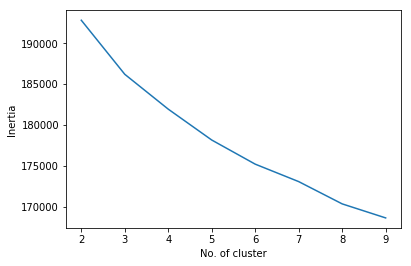

In [0]:

from sklearn.cluster import KMeans
dict_k = {}
for i in tqdm(range(2,10)):
    clus_tf = KMeans(n_clusters = i)
    clus_tf.fit(Final_matrix)
    dict_k[i] = clus_tf.inertia_
plt.plot(list(dict_k.keys()), list(dict_k.values()))
plt.xlabel("No. of cluster")
plt.ylabel("Inertia")
plt.show()

Elbow is not be clear and sharp

### B. The Silhouette Method

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

I mentioned before that a high Silhouette Score is desirable. The Silhouette Score reaches its global maximum at the optimal k. This should ideally appear as a peak in the Silhouette Value-versus-k plot.
Here is the plot for our own dataset:

In [0]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in tqdm(range(2, kmax+1)):
  kmeans = KMeans(n_clusters = k).fit(Final_matrix)
  labels = kmeans.labels_
  sil.append(silhouette_score(Final_matrix, labels, metric = 'euclidean'))



100%|██████████| 9/9 [5:15:26<00:00, 2361.96s/it]


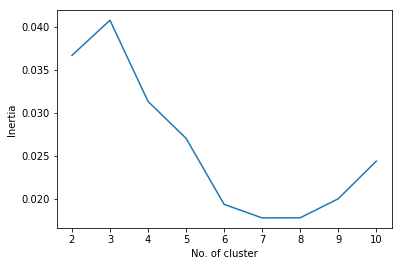

In [0]:
k=[2,3,4,5,6,7,8,9,10]
plt.plot(k, sil)
plt.xlabel("No. of cluster")
plt.ylabel("Inertia")
plt.show()

here is a clear peak at k = 3. Hence, it is optimal.

The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.
Therefore, the Elbow Method and the Silhouette Method are not alternatives to each other for finding the optimal K. Rather they are tools to be used together for a more confident decision.

 The first thing we will do is cluster the data points using KMeans. Since the Words are represented as vectors, applying KMeans is easy to do since the clustering algorithm will simply look at differences between vectors (and centers).

## 10.2.2 Applying K-Means using best Hyper Parameter

In [0]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    #pred = kmeans_clustering.fit_predict(bow_train);
    idx = kmeans_clustering.fit_predict(word_vectors);
    return kmeans_clustering.cluster_centers_, idx;

I run KMeans on K=3 clusters

In [0]:
centers, clusters = clustering_on_wordvecs(tfidf_w2v_train,3);

In [0]:
centers[2].shape

(701,)

In [0]:
centers.shape

(3, 701)

In [0]:
word_embeddings= tfidf_w2v_train.toarray()

In [0]:
word_embeddings.shape

(37500, 701)

## 10.2.3 Finding Indexes of Points In each Cluster

Next, we get Points in each cluster that are closest to the cluster center. To do this, we initialize a KDTree on the  vectors, and query it for the Top K Points on each cluster center.

In [0]:
#in this Function we apply Knn on cluster Centers to extract top Points around it
from sklearn.neighbors import KDTree
def get_index_of_data_points( wordvecs, centers):
    tree = KDTree(word_embeddings)
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=70) for x in centers];
    closest_points_idxs = [x[1] for x in closest_points];
    index = {};
    for i in range(0, len(closest_points_idxs)):
     
         index['Cluster #' + str(i+1)] = closest_points_idxs[i][0]
    return index; 

In [0]:
closest_index= get_index_of_data_points(tfidf_w2v_train,centers)

##### Cluster Index is a Dictionary which contains indexes of Points corresponding to each cluster

In [0]:
closest_index

{'Cluster #1': array([15919, 29545, 13438, 24187, 34007, 23279,  9214, 23460, 23926,
        11037, 36035, 15557, 10817, 17275, 19823, 25701, 20729,  8466,
        13121, 17951, 22086, 35407, 14634, 24730, 13372, 16309, 16181,
        11937, 29907, 27324, 26183,  1094, 12096, 13828,  6399, 33056,
        29975, 13685, 18267,  7828, 18598, 33275, 23267,  2545,   627,
        31228, 19081, 24583, 27493, 21917, 30983, 20542, 37477, 18495,
         6927, 25830, 29162, 32005, 10311, 26816, 33669,  9516, 27862,
        21350, 32136, 10955,  6328, 37115,   482, 27567]),
 'Cluster #2': array([19952, 16581, 13689, 35856, 24099, 37061, 31717, 20506, 29760,
         4471,  7051,  1772,  9339, 34152, 30714, 32446, 25413, 30228,
        33526, 19340, 34710,  5943, 30595, 14749, 19474, 16338, 13695,
         3833,  2553, 20430, 10695, 20580, 21595, 13665, 23953, 20030,
        15078, 26788, 30283, 15966,  7146, 33886, 13125,  2409,  6686,
        21997, 21751, 31315, 30550,  6777, 13878, 14488, 1044

## 10.2.4 Ananlysis of Each Cluster

In [0]:
for i in range(0, len(closest_index)):
    index =  closest_index['Cluster #' + str(i+1)]
    a= len(index)
    c = X_train.iloc[index,:]
    # Number of reviews in different clusters
    print("No. of essays in  Cluster #" + str(i+1))
    print(a)
    
    print('Let us Print Two Essays from cluster'+ str(i+1))
   
    print('Essay- 1 : \n %s\n'%(c['preprocessed_essay'].values[23]))
    print('Essay- 2 : \n %s\n'%(c['preprocessed_essay'].values[45]))
    print("="*200)
  

No. of essays in  Cluster #1
70
Let us Print Two Essays from cluster1
Essay- 1 : 
 our fine arts magnet school located vibrant diverse community although high poverty district school able retain fine arts magnet status however challenge find funding exciting date learning materials one hundred percent students attend school receive free reduced price lunch we highly diverse immigrant population as choice school students many different backgrounds countries attend fine arts program our staff works hard provide materials need enhance learning improve health well last year i number students seemed constant movement at first worrisome i students asked sit could complete work however learned students happier productive motion one students cleared high shelf unit invited student group go work it worked the students said need really high desks mrs ahern therefore project i asking two standing desks jogging bar keep active students standing like prefer still focused the stool like sit high swi

## 10.2.5 Now let's print some wordclouds to have a glimpse at what kind of words appear in our Essay's  Of Each Cluster 

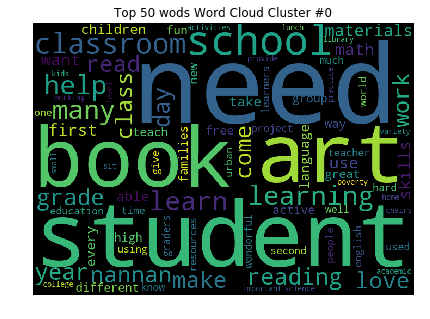

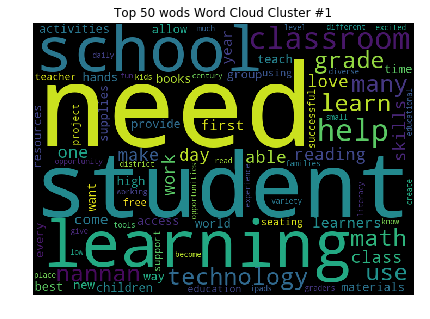

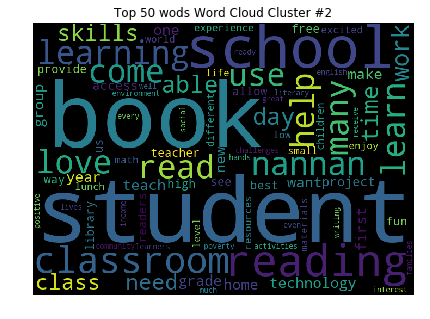

In [0]:
#vec = CountVectorizer().fit(corpus)
#Here we get a Bag of Word model that has cleaned the text, removing non-aphanumeric characters and stop words.
#bag_of_words = vec.transform(corpus)
#bag_of_words a matrix where each row represents a specific text in corpus and each column represents a word in vocabulary, that is, all words found in corpus. Note that bag_of_words[i,j] is the occurrence of word j in the text i.
#sum_words = bag_of_words.sum(axis=0)
#sum_words is a vector that contains the sum of each word occurrence in all texts in the corpus. In other words, we are adding the elements for each column of bag_of_words matrix.
#words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
#words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#Finally we sort a list of tuples that contain the word and their occurrence in the corpus.





def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
     
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
  
  
  
#Now I want to get the top  common words Corresponding to each cluster:
top_50={}


for i in range(0, len(closest_index)):
    cluster_index =  closest_index['Cluster #' + str(i+1)]
    list(cluster_index)
    common_words = get_top_n_words(X_train.iloc[cluster_index,:]['preprocessed_essay'], 100)
    cluster_words=[]
    for word, freq in common_words:
       cluster_words.append(word)
    top_50['Cluster #' + str(i)] =cluster_words

df = pd.DataFrame(top_50);
df.index = df.index+1

#Although we can print the Top words from the cluster, it may be easier to visualize them in a WordCloud. The next function will create a word cloud with the words of a cluster and print and save them.

from wordcloud import WordCloud
def display_cloud(cluster_num):
  cloud = WordCloud(width=700, height=500).generate(" ".join(df['Cluster #' + str(cluster_num)]))
  plt.figure(figsize=(9, 5))
  plt.imshow(cloud)
  plt.axis('off')
  ax = plt.axes()
  ax.set_title('Top 50 wods Word Cloud Cluster #' + str(cluster_num))
  

  
for i in range(0,3):
    
    display_cloud(i)

# **10.3 AgglomerativeClustering**

In [ ]:
Applying K-Means using best Hyper Parameter

## 10.3.1 Find the best hyper parameter

### 10.3.1.1 Visualizing data in 2d

In [0]:
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 

#### A.Reducing the dimensionality of the Data


In [0]:
#https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/


from sklearn.preprocessing import StandardScaler, normalize 

# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
word_embeddings= tfidf_w2v_train.toarray()
X_normalized = normalize(word_embeddings) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [0]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

#### B. Building and Visualizing the different clustering models for different values of k(number of clusters)

##### Number of Clusters=2

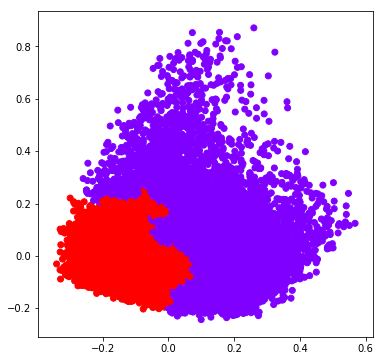

In [0]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

##### Number of Clusters=3

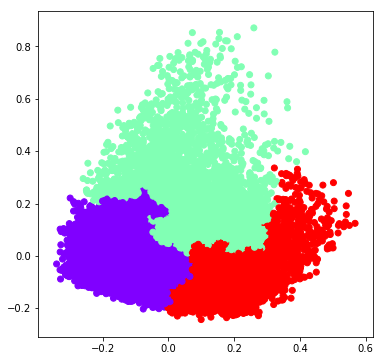

In [0]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

##### Number of Clusters=4

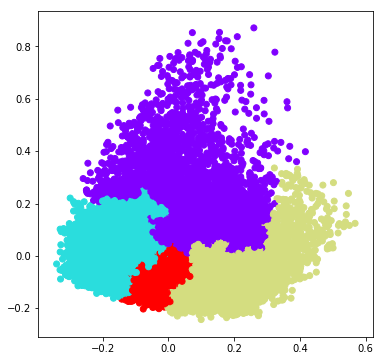

In [0]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

##### Number of Clusters=5

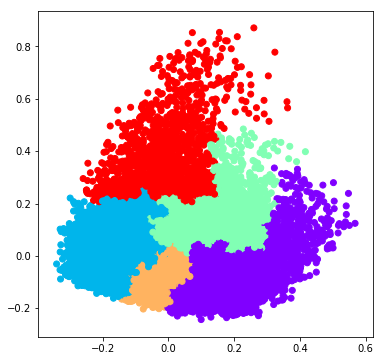

In [0]:
c5 = AgglomerativeClustering(n_clusters = 5) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = c5.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

#### C. Evaluating the different models and Visualizing the results.

We now determine the optimal number of clusters using a mathematical technique. Here, We will use the Silhouette Scores for the purpose.

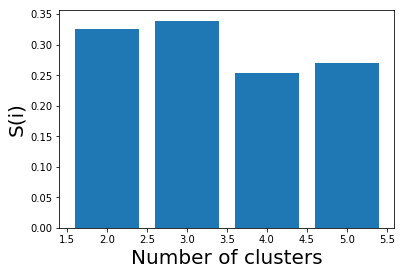

In [0]:
from sklearn.metrics import silhouette_score
k = [2, 3, 4, 5] 

# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, c5.fit_predict(X_principal))) 

# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

Thus, with the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is 3.

## 10.3.2 Applying Hierarchial Clustering with best Hyper Parameter

#### Below Function Returns the indices of points in each cluster

In [0]:
#https://stackoverflow.com/questions/14633376/how-do-i-correlate-my-original-data-with-clustered-data


def cluster_indices(cluster_assignments):
    n = cluster_assignments.max()
    indices = []
    for cluster_number in range(1, n + 1):
        indices.append(np.where(cluster_assignments == cluster_number)[0])
    return indices

 

In [0]:
# Agglomerative Clustering
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.fcluster.html
import scipy
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt


k=3

d = sch.distance.pdist(tfidf_w2v_train.toarray())
#Performs hierarchical/agglomerative clustering on the condensed distance matrix y.
Z= sch.linkage(d,method='ward')

# Compute the clusters.
#Forms flat clusters from the hierarchical clustering defined by the linkage matrix Z.    
cluster_assignments = sch.fcluster(Z, k, 'maxclust')

# Print the indices of the data points in each cluster.
num_clusters = cluster_assignments.max()
#print "%d clusters" % num_clusters
indices = cluster_indices(cluster_assignments)

## 10.3.3 Now let's print some wordclouds to have a glimpse at what kind of words appear in our Essay's Of Each Cluster

#### Let us now writ a code to extract top  words from each cluster

In [0]:
def get_top_n_words(corpus, n=None):
    
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
     
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

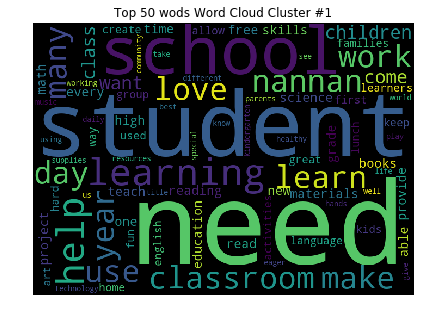

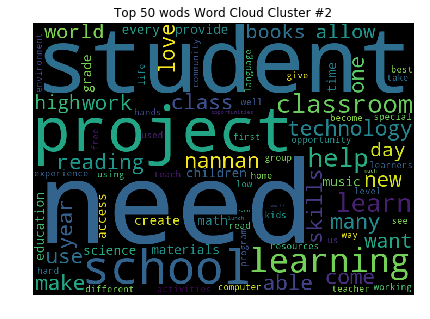

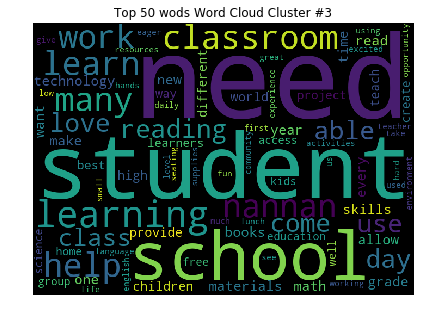

In [0]:
top_50={}
cluster_index={}
for k, ind in enumerate(indices):
      cluster_index['Cluster #' + str(k + 1 )]= ind
      common_words = get_top_n_words(X_train.iloc[ind,:]['preprocessed_essay'], 100)
      cluster_words=[]
      for word, freq in common_words:
          cluster_words.append(word)
      top_50['Cluster #' + str(k + 1 )] =cluster_words
        

df = pd.DataFrame(top_50);
df.index = df.index+1


from wordcloud import WordCloud
def display_cloud(cluster_num):
    cloud = WordCloud(width=700, height=500).generate(" ".join(df['Cluster #' + str(cluster_num)]))
    plt.figure(figsize=(9, 5))
    plt.imshow(cloud)
    plt.axis('off')
    ax = plt.axes()
    ax.set_title('Top 50 wods Word Cloud Cluster #' + str(cluster_num))
  

  
for i in range(0,3):
    
    display_cloud(i+1)

In [0]:
df = pd.DataFrame(top_50);
df.head(7)




,Cluster #1,Cluster #2,Cluster #3
0,students,students,students
1,school,school,school
2,my,learning,my
3,they,the,learning
4,the,my,classroom
5,learning,classroom,the
6,help,not,not


In [0]:
cluster_index

{'Cluster #1': array([    3,     8,     9, ..., 37452, 37477, 37493]),
 'Cluster #2': array([   40,    71,   117, ..., 37447, 37469, 37488]),
 'Cluster #3': array([    0,     1,     2, ..., 37497, 37498, 37499])}

## 10.3.4 Cluster Analysis

In [0]:
for i in range(0, len(cluster_index)):
    index =  cluster_index['Cluster #' + str(i+1)]
    a= len(index)
    c = X_train.iloc[index,:]
    # Number of reviews in different clusters
    print("No. of essays in  Cluster #" + str(i+1))
    print(a)
    
    print('Let us Print Two Essays from cluster'+ str(i+1))
   
    print('Essay- 1 : \n %s\n'%(c['preprocessed_essay'].values[23]))
    print('Essay- 2 : \n %s\n'%(c['preprocessed_essay'].values[45]))
    print("="*200)
    

No. of essays in  Cluster #1
1444
Let us Print Two Essays from cluster1
Essay- 1 : 
 my students wonderful bunch eager learn put forth great effort class materials currently i work large culturally linguistically diverse group learners include primary grade levels i work students autism emotional disturbance students specific learning disabilities speech language impairments my students attend elementary school close 70 students english language learners 90 students receive free reduced price lunch my students hard time sitting still class one students complained difficult sit chair she told last year sat stool helped focus this students came perfect kid inspired answer remaining task getting wiggles stools they asked get stools my students also mentioned like using yoga ball sit not like would move around lot they asked could get couple zenergy chairs offer stability they agreed good option alternative seating class these zenergy ball chairs delight engage turning classroom environmen

# 10.4  Apply DBSCAN

In [0]:
# X_train_agg = X_train_agg[np.logical_not(np.isnan(X_train_agg))]

In layman’s terms, we find a suitable value for epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results. Then we look to see where the change is most pronounced (think of the angle between your arm and forearm) and select that as epsilon.


We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.

## 10.4.1 Finding Best Hyperparametr eps

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
min_point = 700
knn = NearestNeighbors(n_neighbors = min_point)
knn.fit(tfidf_w2v_train)
dist , index = knn.kneighbors(tfidf_w2v_train)

Next, we sort and plot result.
The optimal value for epsilon will be found at the point of maximum curvature.

 You can try to do a knn distance histogram and choose a "knee"

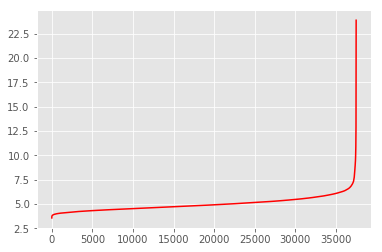

In [0]:
#https://datascience.stackexchange.com/questions/10162/knn-distance-plot-for-determining-eps-of-dbscan
sort = sorted(dist[:,min_point-1])
plt.plot(list(range(1,(tfidf_w2v_train.shape[0])+1)),sort,'r-')
plt.show()

The optimal value for epsilon will be found at the point of maximum curvature.It can be seen that the optimal eps value is around a distance of 5.5 and 7.

In [0]:
pip install kneed

To get the Exact Value of eps

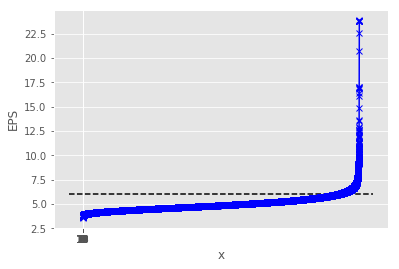

In [0]:
#https://stackoverflow.com/questions/4471993/compute-the-elbow-for-a-curve-automatically-and-mathematically
y = sort
x = list(range(1,(tfidf_w2v_train.shape[0])+1))
plt.xlabel('x')
plt.ylabel('EPS')
plt.xticks(range(1,21))
plt.plot(x, y, 'bx-')
plt.hlines(kneedle.knee, plt.xlim()[0], plt.xlim()[1], linestyles='dashed')

In [0]:
from kneed import DataGenerator, KneeLocator

sort = sorted(dist[:,min_point-1])
kneedle = KneeLocator(list(range(1,(tfidf_w2v_train.shape[0])+1)),sort ,  curve='convex', direction='increasing')
print(round(kneedle.knee, 3))


print(round(kneedle.elbow, 3))

6
6


## 10.4.2 Applyging DBSCAN with best Hyperparametr 

### 10.4.2.1 Visualizing data in 2d

#### A. Reducing the dimensionality of the data to make it visualizable

In [0]:
#https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

from sklearn.preprocessing import StandardScaler, normalize 

# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
word_embeddings= tfidf_w2v_train.toarray()
X_normalized = normalize(word_embeddings) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [0]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head())

         P1        P2
0  0.087523 -0.023932
1 -0.062786 -0.101227
2 -0.177401 -0.073262
3  0.049502  0.423152
4 -0.154643  0.104374


#### B. Building the clustering model

In [0]:
from sklearn.cluster import DBSCAN

# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 6, min_samples = 700).fit(X_principal) 
labels = db_default.labels_ 

#### C. Calculating the number of clusters

In [0]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 1


#### D. Visualizing the clustering

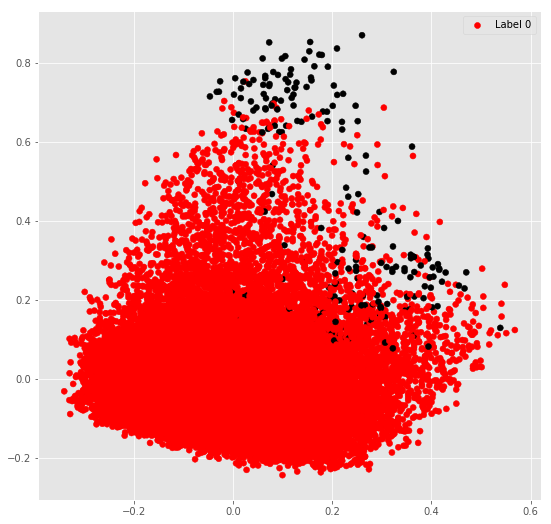

In [115]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'


colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  

# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# Building the legend 
plt.legend((r,  k), ('Label 0', 'Label -1')) 
  
plt.show() 

The model classified the densely populated areas. As we can see, all the black points were categorized as noise.

##### Let us Remove the noise points and again plot the result's

[0 0 0 ... 0 0 0]
['r']


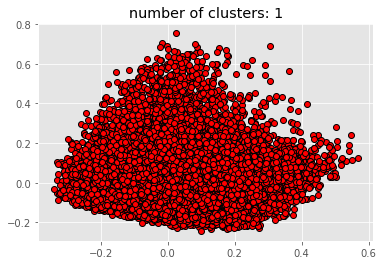

In [117]:
#https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/

from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 

core_samples_mask = np.zeros_like(db.labels_, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True



# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(labels) 
  
# Plot result 
import matplotlib.pyplot as plt 
  
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = [  'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X_principal[class_member_mask & core_samples_mask] 
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X_principal[class_member_mask & ~core_samples_mask] 
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 


### 10.4.2.2 Applying DBscan to original data

In [0]:
db = DBSCAN(eps = 6 , min_samples = 700)
p = db.fit_predict(tfidf_w2v_train)

Storing the labels formed by the DBSCAN


##### The labels_ property contains the list of clusters and their respective points.

In [0]:
labels = db.labels_

In [0]:
len(labels)

37500

Index is a list that contains indices of all points in a cluster  excepy noise

In [0]:
index = []
for i in range(len(p)):
    if p[i] == 0:
        index.append(i)
print(len(index))

37291


In [0]:
a= len(index)
c = X_train.iloc[index,:]
# Number of reviews in different clusters
print("No. of essays in  Cluster #1")
print(a)

No. of essays in  Cluster #1
37291


In [0]:
preprocessed_text = []
# tqdm is for printing the status bar
for sent in c['preprocessed_essay'].values:
    
    sent = sent.replace('nannan',' ')
    preprocessed_text .append(sent.lower().strip())

## 10.4.3 Now let's print some wordclouds to have a glimpse at what kind of words appear in our Essay's Of the Cluster

Text(0.5, 1.0, 'Top  wods Word Cloud Cluster #1')

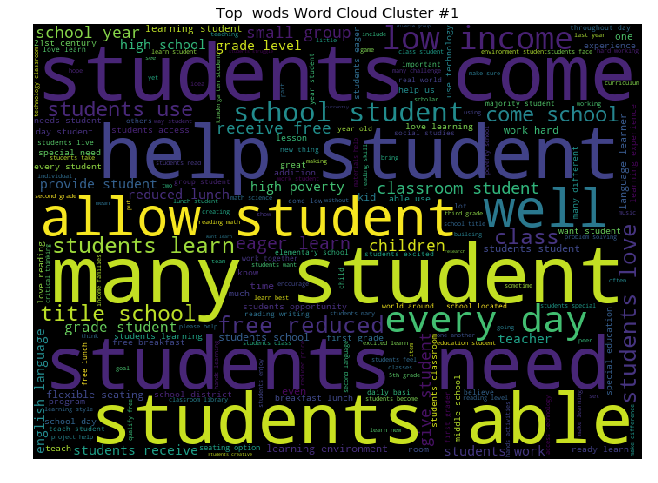

In [118]:
from wordcloud import WordCloud

cloud = WordCloud(width=700, height=500).generate(" ".join(preprocessed_text ))
plt.figure(figsize=(12, 8))
plt.imshow(cloud)
plt.axis('off')
ax = plt.axes()
ax.set_title('Top  wods Word Cloud Cluster #1' )
  

  

    


Unlike k-means, DBSCAN will figure out the number of clusters. DBSCAN works by determining whether the minimum number of points are close enough to one another to be considered part of a single cluster. DBSCAN is very sensitive to scale since epsilon is a fixed value for the maximum distance between two points.

## **Conclusion**

1. We have applied K means, agglomerative & DBSCAN Algorithm on Matrix obtained by TFIDF W2V with 50k data points. By help of word cloud,we can interpret what type of word are there in cluster.

2. We need to train one time, and we can get any number of clusters from Agglomerative clustering(Dendograms).

3. Kmeans and Agglomerative clustering worked well for our data and we got nice clusters but DBSCAN was not able to cluster our data properly.

In [2]:
 #Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable


x = PrettyTable()
x.field_names = ["Vectorizer Used", "Model", "Hyprer Parameter", "Number of clusters"]



x.add_row(["TFIDF W2V", "K-Means", 'k=3', 3])

x.add_row(["TFIDF W2V", "Hierarchial Clustering", 't=3', 3])

x.add_row(["TFIDF W2V", "Dbscan",'eps=6 and min_pts=700',1])





print(x)

+-----------------+------------------------+-----------------------+--------------------+
| Vectorizer Used |         Model          |    Hyprer Parameter   | Number of clusters |
+-----------------+------------------------+-----------------------+--------------------+
|    TFIDF W2V    |        K-Means         |          k=3          |         3          |
|    TFIDF W2V    | Hierarchial Clustering |          t=3          |         3          |
|    TFIDF W2V    |         Dbscan         | eps=6 and min_pts=700 |         1          |
+-----------------+------------------------+-----------------------+--------------------+
